### 추가설명 DataFrame 인덱싱 슬라이싱
- 인덱싱: 데이터를 하나만 가져올 때 사용한다
- 슬라이싱 : 여러개의 데이터를 범위로 잘라올 때 사용한다


In [7]:
import pandas as pd
name = ['John','Jenny','Nate','Julia','Brian']
age = [20,30,30,40,45]
job = ['student','developer','teacher','dentist','manager']
dic = { 'name':name,'age':age,'job':job}
df = pd.DataFrame(dic)
df

,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager


In [8]:
# 데이터 프레임에서 컬럼에 접근할 때
# df['컬럼1'] 하나의 컬럼을 가져올 때
# df[['컬럼1','컬럼2']] 두개 이상의 컬럼을 가져올 때

#인덱서 활용(행부터 접근)
# df.loc[행,열] 
# df.iloc[행,열] => iloc[2:4,3:6]

# 행데이터만 가져오고 싶을 때는 그냥 행만 적어주면 된다
# df.loc[행]

In [33]:
# 1. name컬럼 뽑아오기
# 1-1) 열인덱싱 -> 시리즈 데이터
print(df['name'])
# 1-2) loc 사용
print(df.loc[:,'name'])
# 1-3) iloc 사용
print(df.iloc[:,0])

0     John
1    Jenny
2     Nate
3    Julia
4    Brian
Name: name, dtype: object
0     John
1    Jenny
2     Nate
3    Julia
4    Brian
Name: name, dtype: object
0     John
1    Jenny
2     Nate
3    Julia
4    Brian
Name: name, dtype: object


In [76]:
# 2. age, job 두개의 컬럼 뽑아오기 -> 데이터프레임
# 2-1) 단순하게 열 인덱싱
print(df[['age','job']])
# 2-2) loc 사용
df.loc[:,['age','job']]
#2-3) iloc 사용
df.iloc[:,1:]

   age        job
0   20    student
1   30  developer
2   30    teacher
3   40    dentist
4   45    manager


,age,job
0,20,student
1,30,developer
2,30,teacher
3,40,dentist
4,45,manager


In [67]:
#3. John~Nate 데이터 뽑아오기(행)
# 3-1) 단순하게 행 슬라이싱
print(df[0:3])
# 3-2) loc 사용
print(df.loc[0:2,:])
# 3-3) iloc 사용
print(df.iloc[0:3,:])

    name  age        job
0   John   20    student
1  Jenny   30  developer
2   Nate   30    teacher
    name  age        job
0   John   20    student
1  Jenny   30  developer
2   Nate   30    teacher
    name  age        job
0   John   20    student
1  Jenny   30  developer
2   Nate   30    teacher


In [1]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
# 머신러닝 패키지
from sklearn.neighbors import KNeighborsClassifier #KNN 분류모델
from sklearn.metrics import accuracy_score # 정확도 측정도구

### 우리의 목표!
- 문제 정의
500명의 키와 몸무게 데이터를 활용하여 비만도를 판단해주는 모델 만들어보기!
(머신러닝 과정 학습해보기)

##### 데이터 수집

In [3]:
import pandas as pd
data = pd.read_csv("data/bmi_500.csv",index_col = 'Label')
# 인덱스로 컬럼 중 하나인 라벨을 보내줄거야! 

In [4]:
# 데이터 살펴보기
# 크기
data.shape
# 행 데이터 -> 500명의 데이터 
# 열 데이터 -> 성별, 키, 몸무게

(500, 3)

##### 데이터 전처리 하기
- 결측치, 이상치 처리

In [5]:
# 전체 데이터 확인
data.info()
# 결측치가 존재하지 않음 -> 특별한 조치가 필요하지 않음 

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


##### 탐색적 데이터 분석(EDA-Exploratory Data Analysis)
- 데이터 세트들의 특성을 확인한다
- 기술통계확인(통계량에 대해 적어준 데이터) - 평균, 최대값, 최소값, 4분위수
- 시각화를 통해서 데이터의 분포현황을 알아본다

In [6]:
# 기술통계 확인하기 discribe() - 통계랑을 한번에 확인 가능하다
data.describe()
# 데이터개수, 평균, 표준편차, 최솟값, 4사분위수
# 평균과 중위값(50%)이 얼마 차이가 크지 않음 -> 이상치가 없다! 

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [7]:
# Label(정답) 데이터
# label(범주형 데이터)->분류모델
data.index.unique() # 유일한 값들만 출력
# 'Extreme Obesity' : 고도비만
# 'Overweight' : 과체중
# 'Obesity': 비만
# 'Normal' : 보통
# 'Weak' : 저체중
# 'Extremely Weak': 심한 저체중
# 6개의 클래스를 가짐 

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [8]:
# 각 클래스들의 개수를 확인하기
data.index.value_counts()
# 데이터가 편중되어있다 -> 제대로 할때는 저체중 이하 데이터를 더 가져와야함
# 고도비만이 많은 편이다 -> 편중된 데이터 -> 다시 데이터 수집 추천 

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64

In [9]:
# 남녀의 개수 세보기
data.Gender.value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [10]:
data['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

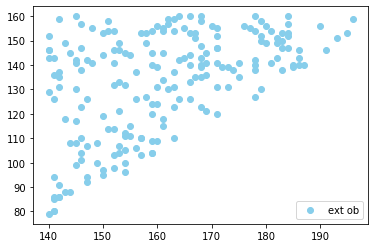

In [11]:
# 데이터 label별 분포 현황 시각화 -> 산점도(scatter, 데이터가 얼마나 흩어져있는지)
# 먼저 하나의 label에 대해 시각화 진행
# 인덱스의 이름이 고도비만(Extreme Obesity)인 컬럼만 가져와주세요 
eo =data.loc['Extreme Obesity']

# plt.scatter(x축 - 키데이터, y- 체중데이터)
plt.scatter(eo['Height'],eo['Weight'],color='skyblue',label ='ext ob')
plt.legend()
plt.show()

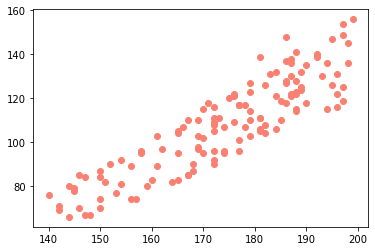

In [13]:
ob = data.loc['Obesity']

#plt.scatter(x축 - 키데이터, y- 체중데이터)
plt.scatter(ob['Height'],ob['Weight'], color='salmon', label='ob')
plt.legend
plt.show()

In [ ]:
# 하나씩 모든 클래스를 시각화 해주면 코드가 너무 길어짐
# 우리는 함수로 묶어서 코드를 작성해주겠다. 

In [20]:
# 함수 정의하기 !
def bmi(label,color):
    d= data.loc[label]
    plt.scatter(d['Height'],d['Weight'], c=color, label=label)

In [15]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

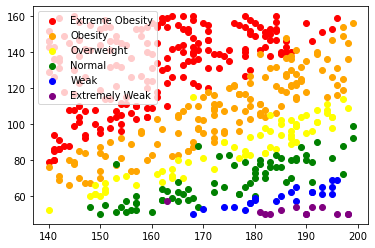

In [22]:
# 함수 호출하기 ! 
bmi('Extreme Obesity','red')
bmi('Obesity','orange')
bmi('Overweight','yellow')
bmi('Normal','green')
bmi('Weak','blue')
bmi('Extremely Weak','purple')

plt.legend()
plt.show()

# 탐색적 데이터 분석을 하면서 데이터 전처리에 대해 생각 가능
# 현재는 큰 이상치는 아니기 때문에 그냥 진행하겠다
# 만약 정확도가 많이 낮다면 다시 전처리부터 진행하기 

#### 모델링
- 문제와 답으로 데이터를 분리

In [ ]:
# 특정키와 특정 몸무게 값이 있으면 -> X
# 그 특정 데이터에 맞는 정답값 -> y

In [ ]:
# 데이터 셋팅
# X= 문제데이터 - 키와 몸무게
# y= 정답데이터 - 비만도 

In [23]:
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [42]:
X = data.iloc[:,1:3]
y = data.index

In [43]:
print('훈련용 문제 데이터 :',X.shape)
print('훈련용 답 데이터 :',y.shape)

훈련용 문제 데이터 : (500, 2)
훈련용 답 데이터 : (500,)


In [40]:
X_train

,Height,Weight
Label,,
Obesity,174,96
Normal,189,87
Obesity,185,110
Overweight,195,104
Overweight,149,61
...,...,...
Extreme Obesity,150,153
Obesity,184,121
Extreme Obesity,141,136


In [48]:
# 상위 5개 행만 출력해보기
display(X.head())

,Height,Weight
Label,,
Obesity,174,96
Normal,189,87
Obesity,185,110
Overweight,195,104
Overweight,149,61


In [ ]:
# 전체 데이터를 학습용 데이터와 테스트용 데이터로 분리하기
# 훈련용 데이터 70% 테스트용 데이터 30%로 분리


In [65]:
# 훈련용 데이터 ---> 350개
X_train = X.iloc[:350]
y_train = y[:350]

X_test = X.iloc[350:]
y_test = y[350:]

# 크기 확인
print('훈련용 문제데이터',X_train.shape)
print('훈련용 정답데이터',y_train.shape)
print('테스트용 문제데이터',X_test.shape)
print('테스트용 정답데이터',y_test.shape)

훈련용 문제데이터 (350, 2)
훈련용 정답데이터 (350,)
테스트용 문제데이터 (150, 2)
테스트용 정답데이터 (150,)


##### 모델 객체 생성하기, 하이퍼파라미터 설정

In [73]:
# 모델 객체 생성
knn = KNeighborsClassifier(n_neighbors=5)
# 나랑 가장 가까운 이웃 하나만 보겠다 
# n_neighbors=5 나랑 가까운 5명의 이웃데이터를 보겠다 

##### 모델 학습

In [74]:
# 모델 학습 (fit)
knn.fit(X_train, y_train)
# KNeighborsClassifier(n_neighbors=1) -> 어 나 잘 학습했어~ 

KNeighborsClassifier()

In [75]:
# 모델 예측 - predict(테스트용 문제)
pre = knn.predict(X_test)

In [76]:
# 모델 평가 - accuracy_score(예측한 데이터, 실제 답)
accuracy_score(pre,y_test)
# 정확도가 출력됨 

0.9066666666666666

In [77]:
# 또다른 모델 평가 방법 - 모델.score(테스트용 문제, 테스트용 답 )
knn.score(X_test, y_test)
# 89%가 아쉽다? - > 하이퍼 파라미터 조정 


0.9066666666666666